In [1]:
import pandas as pd

df = pd.read_csv("../data/intermediate data/credit_card_churn.csv")

print("Rows and columns:", df.shape)
print("Columns:\n", df.columns.tolist())
df.head()


Rows and columns: (10127, 23)
Columns:
 ['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [2]:
print("Data types:\n", df.dtypes)
print("Null values:\n", df.isnull().sum())
print("Unique values in target:\n", df['Attrition_Flag'].unique())


Data types:
 CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         

In [3]:
df['churn'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)


In [4]:
df = df.drop(['CLIENTNUM', 'Attrition_Flag'], axis=1)


In [5]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:\n", cat_cols)


Categorical columns:
 ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [6]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [7]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (8101, 34)
Test shape: (2026, 34)


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

    Retained       1.00      1.00      1.00      1699
     Churned       1.00      1.00      1.00       327

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



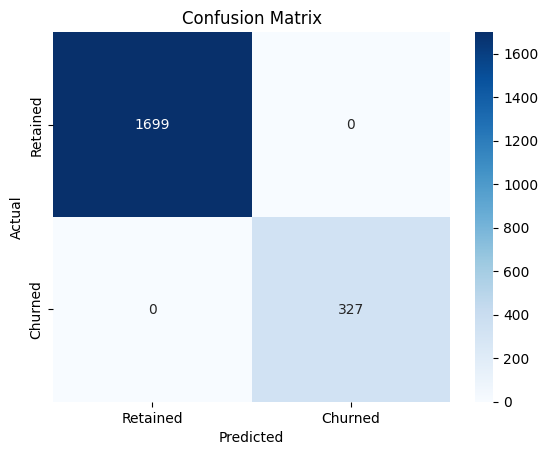

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Retained', 'Churned']))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Retained', 'Churned'], yticklabels=['Retained', 'Churned'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_484\3567477728.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances.head(10), x='Importance', y='Feature', palette='viridis')


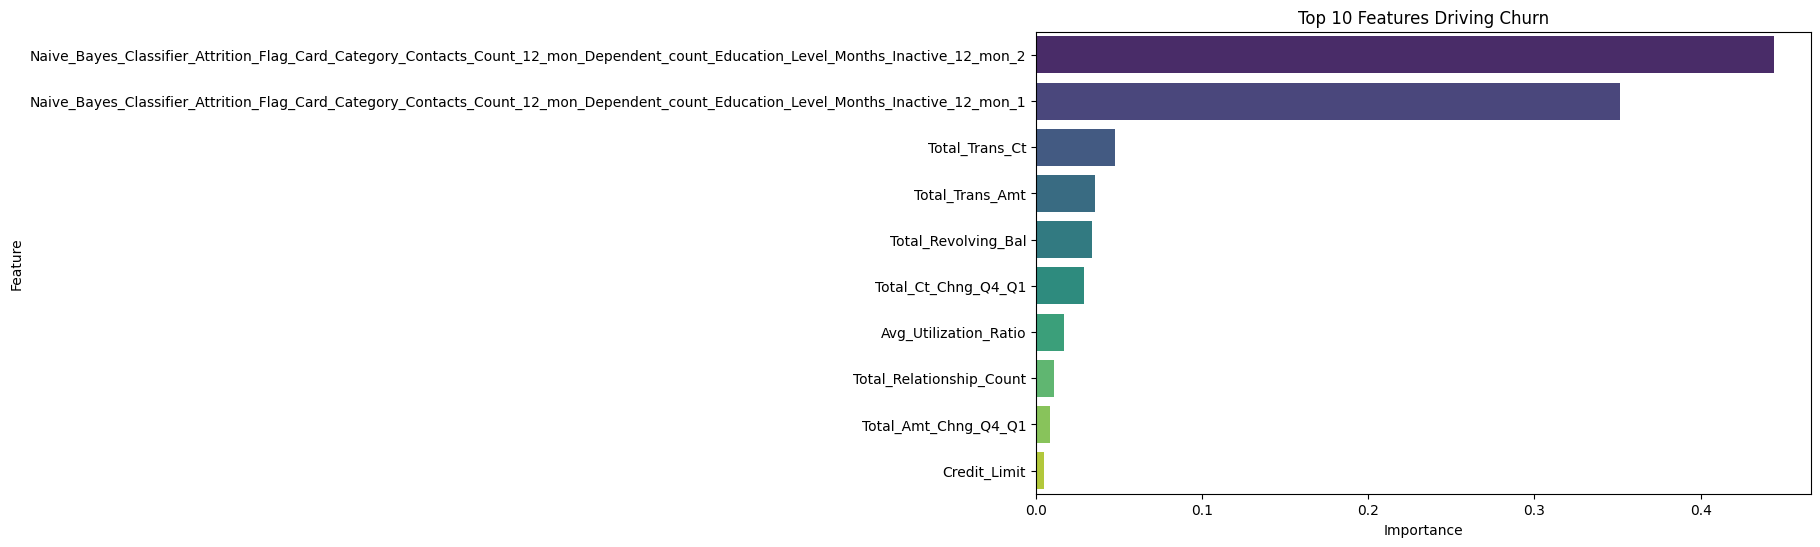

In [9]:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importances.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Features Driving Churn")
plt.show()

In [10]:
leak_cols = [col for col in df_encoded.columns if col.startswith("Naive_Bayes_Classifier")]
df_encoded = df_encoded.drop(columns=leak_cols)

In [11]:
X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (8101, 32)
Test shape: (2026, 32)


Accuracy: 0.9521224086870681

Classification Report:
               precision    recall  f1-score   support

    Retained       0.95      0.99      0.97      1699
     Churned       0.94      0.76      0.84       327

    accuracy                           0.95      2026
   macro avg       0.95      0.87      0.90      2026
weighted avg       0.95      0.95      0.95      2026



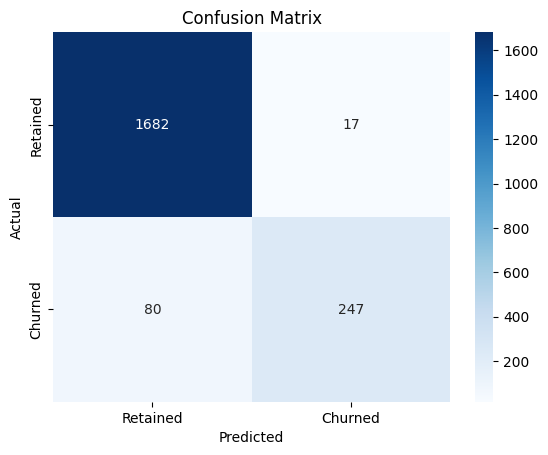

In [12]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Retained', 'Churned']))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Retained', 'Churned'], yticklabels=['Retained', 'Churned'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_484\3567477728.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances.head(10), x='Importance', y='Feature', palette='viridis')


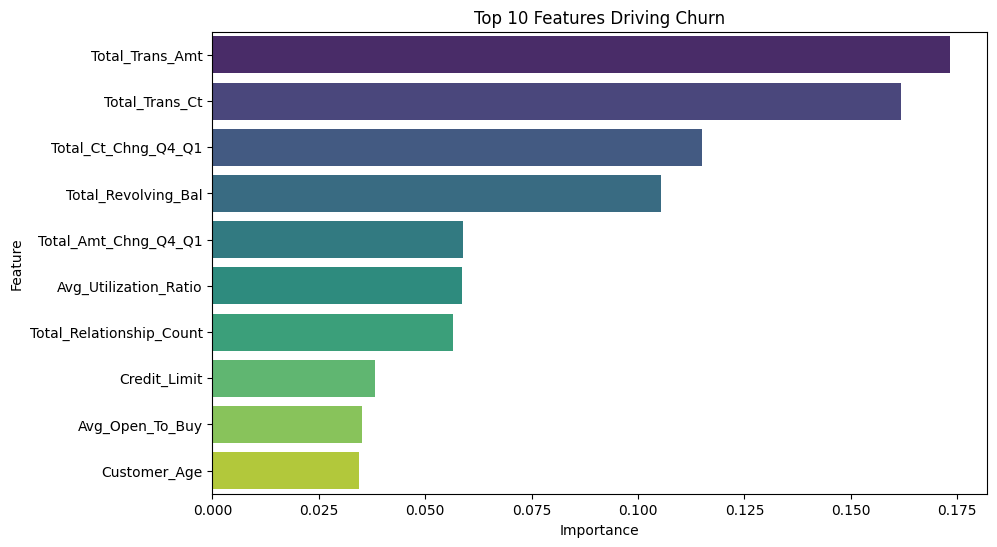

In [13]:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importances.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Features Driving Churn")
plt.show()

In [14]:
import os
import joblib

os.makedirs("../outputs", exist_ok=True)
joblib.dump(model, "../outputs/churn_model.pkl")

print("Model saved to ../outputs/churn_model.pkl")


Model saved to ../outputs/churn_model.pkl
